In [49]:
import numpy as np
import pandas as pd
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from tools import *

In [9]:
PATH_TO_RESULTS = '/Users/ulyana/Documents/GSSI/PhD Projects/GWTC_analysis/'
PATH_TO_PLOTS = '/Users/ulyana/Documents/GSSI/PhD Projects/GWTC_analysis/plots/'

In [10]:
waveform = 'IMRPhenomXPHM'

In [11]:
estimator = 'median'
events = np.loadtxt(PATH_TO_RESULTS + 'info/' + 'events_with_priors_%s.txt' %waveform, dtype=str)
with open(PATH_TO_RESULTS + 'info/' + 'detectors_dictionary.pkl', 'rb') as f:
    detectors = pickle.load(f)

In [12]:
params = ['chirp_mass', 'mass_ratio', 'luminosity_distance', 'dec', 'ra', 'theta_jn', 'psi', 'phase', 
            'geocent_time', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl']

In [13]:
cl90_lvk = pd.read_hdf(PATH_TO_RESULTS + 'results/confidence_levels/' + 'conf_interval90_lvk_%s.hdf5' %estimator)
cl90_fisher = pd.read_hdf(PATH_TO_RESULTS + 'results/confidence_levels/' + 'conf_interval90_fisher_%s.hdf5' %estimator)
cl90_fisher_plus_priors = pd.read_hdf(PATH_TO_RESULTS + 'results/confidence_levels/' + 'conf_interval90_fisher_plus_priors_%s.hdf5' %estimator)

In [40]:
range_summary = {}
for event in events:
    range_summary[event] = {}
    for param in params:
        range_summary[event][param] = [(cl90_fisher[event][param][1] - cl90_fisher[event][param][0])/(cl90_lvk[event][param][1] - cl90_lvk[event][param][0]),
                                       (cl90_fisher_plus_priors[event][param][1] - cl90_fisher_plus_priors[event][param][0])/(cl90_lvk[event][param][1] - cl90_lvk[event][param][0])]

In [41]:
range_summary = pd.DataFrame(range_summary)

In [43]:
range_summary[event][param][0]

22.0768398328915

In [44]:
fisher_ratio = {key: [] for key in params}
fisher_plus_priors_ratio = {key: [] for key in params}
for param in params:
    for event in events:
        fisher_ratio[param].append(range_summary[event][param][0])
        fisher_plus_priors_ratio[param].append(range_summary[event][param][1])

In [46]:
fisher_ratio = pd.DataFrame(fisher_ratio)
fisher_plus_priors_ratio = pd.DataFrame(fisher_plus_priors_ratio)

In [50]:
lbs_errs = ['snr', 'chirp_mass', 'mass_ratio', 'mass_1', 'mass_2', 'luminosity_distance', 'dec', 'ra', 'theta_jn',
        'psi', 'phase', 'geocent_time', 'a_1', 'a_2', 'tilt_1', 'tilt_2', 'phi_12', 'phi_jl', 'redshift', 
        'mass1_lvk', 'mass2_lvk', 'err_chirp_mass', 'err_mass_ratio', 'err_luminosity_distance', 'err_dec', 'err_ra',
        'err_theta_jn', 'err_psi', 'err_phase', 'err_geocent_time', 'err_a_1', 'err_a_2', 'err_tilt_1',
        'err_tilt_2', 'err_phi_12', 'err_phi_jl', 'err_sky_location']

In [ ]:
for event in events:
    label_err = get_label(detectors, event, estimator, 'errors')
    data = pd.read_csv(PATH_TO_RESULTS + 'results/gwfish_mChirp_q/' + label_err, names = lbs_errs, delimiter=' ', skiprows=1)

ValueError: x and y must be the same size

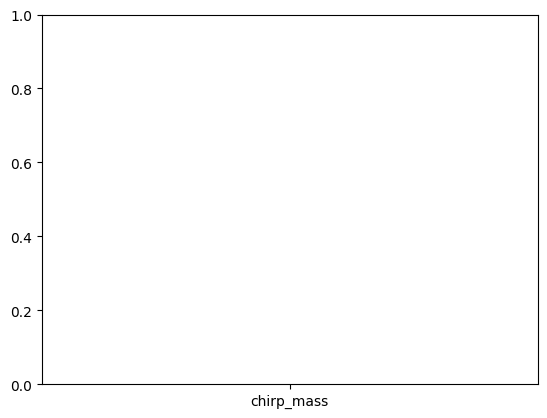

In [48]:
select_param = 'chirp_mass'
sns.set_style("whitegrid")
sns.set_context("paper", font_scale=1.5)
sns.set_palette("colorblind")
sns.set_style({'font.family':'serif', 'font.serif':'Times New Roman'})

ratio = range_summary_df['range_gwfish_medians_' + param] / range_summary_df['range_lvk_' + param]
ratio_priors = range_summary_df['range_gwfish_medians_priors_' + param] / range_summary_df['range_lvk_' + param]
sns.scatterplot(x = range_summary_df['total_mass_medians'], y = ratio, label = 'GWFish')
sns.scatterplot(x = range_summary_df['total_mass_medians'], y = ratio_priors, label = 'GWFish + Priors')
plt.xlabel('Total Mass [M$_{\odot}$]')
plt.ylabel('$\sigma_{GWFish}/\sigma_{LVK}$')
plt.yscale('log')
plt.title('medians - %s' %param)
plt.show()